# Traveling Salesman Problem with 194 cities

## Choice of the algorithm
<hr><hr>

A Genetic Algorithm as it is suited for discrete optimization

## Getting the data
<hr><hr>

In [1]:
from GA.GA import *

In [9]:
# we create a pandas dataframe from the file containing the coordinates of the cities
cities=pd.read_csv("qa194.tsp", skiprows=7, header=None, delimiter=' ')
# we create an list of City object (see city object definition in GA/GA.py)
cities=[City (x[0], x[1]) for x in np.array(cities.iloc[:-1,1:]) ]

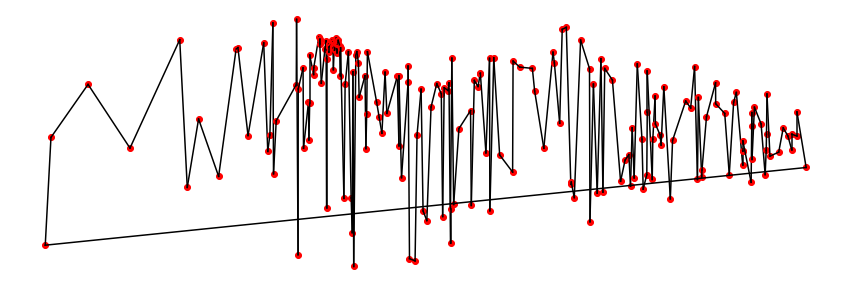

In [10]:
showMap(cities)

## Finding the right parameters
<hr><hr>

To find the right parameter, let's test for a given parameter different values and choose the best one. 
To do so, let's consider the fitness values of 50 runs.

### Mutation rate
The mutation step allows to explore the search space. 
If the mutation rate is too high, it will not allow exploitation, meaning finding a local minimum, which can be the global minimum.
If the the mutation rate is too low, it will allow exploration of the search space. 
Let's try different mutations rates, keeping the other parameters constant, to decide which rate we should use. 

In [12]:
finalDistanceList = []
for i in range(0,50):
    finalDistance = geneticAlgorithm(population=cities, popSize=50, eliteSize=5, mutationRate=0.01, N=10, plot=False)
    finalDistanceList.append(finalDistance[0])
finalDistanceList=np.array(finalDistanceList)
print ('Max Final Distance:' + str(finalDistanceList.max())) 
print ('Min Final Distance:' + str(finalDistanceList.min()) )
print ('Mean Final Distance:' + str(finalDistanceList.mean()) )
print ('STD Final Distance:' + str (finalDistanceList.std() ))

Max Final Distance:78168.34806296718
Min Final Distance:63173.27906058909
Mean Final Distance:69098.01902395207
STD Final Distance:2846.4293861592887


In [13]:
finalDistanceList = []
for i in range(0,50):
    finalDistance = geneticAlgorithm(population=cities, popSize=50, eliteSize=5, mutationRate=0.005, N=10, plot=False)
    finalDistanceList.append(finalDistance[0])
finalDistanceList=np.array(finalDistanceList)
print ('Max Final Distance:' + str(finalDistanceList.max())) 
print ('Min Final Distance:' + str(finalDistanceList.min()) )
print ('Mean Final Distance:' + str(finalDistanceList.mean()) )
print ('STD Final Distance:' + str (finalDistanceList.std() ))

Max Final Distance:73281.71927120483
Min Final Distance:57935.53971113772
Mean Final Distance:64557.927939237416
STD Final Distance:3560.802579056065


In [14]:
finalDistanceList = []
for i in range(0,50):
    finalDistance = geneticAlgorithm(population=cities, popSize=50, eliteSize=5, mutationRate=0.001, N=10, plot=False)
    finalDistanceList.append(finalDistance[0])
finalDistanceList=np.array(finalDistanceList)
print ('Max Final Distance:' + str(finalDistanceList.max())) 
print ('Min Final Distance:' + str(finalDistanceList.min()) )
print ('Mean Final Distance:' + str(finalDistanceList.mean()) )
print ('STD Final Distance:' + str (finalDistanceList.std() ))

Max Final Distance:71249.09338438604
Min Final Distance:47557.39459449602
Mean Final Distance:55977.49723962282
STD Final Distance:5076.11895792284


**Conclusion**

A mutation rate of 0.001 gives better result, we will keep this rate from now on.

### Elite size

The selection of the parents for the cross-over is done by
- keeping the N fittest individuals
- for the rest of the parents, they are randomly selected, with a higher change for the fittest individuals (Roulette Wheel Selection). 

Let's see how the size of the elite influences the best distance.

In [15]:
finalDistanceList = []
for i in range(0,50):
    finalDistance = geneticAlgorithm(population=cities, popSize=50, eliteSize=10, mutationRate=0.001, N=10, plot=False)
    finalDistanceList.append(finalDistance[0])
finalDistanceList=np.array(finalDistanceList)
print ('Max Final Distance:' + str(finalDistanceList.max())) 
print ('Min Final Distance:' + str(finalDistanceList.min()) )
print ('Mean Final Distance:' + str(finalDistanceList.mean()) )
print ('STD Final Distance:' + str (finalDistanceList.std() ))

Max Final Distance:62999.83972980316
Min Final Distance:40493.95925666185
Mean Final Distance:48694.49667644786
STD Final Distance:5122.050528132461


In [16]:
finalDistanceList = []
for i in range(0,50):
    finalDistance = geneticAlgorithm(population=cities, popSize=50, eliteSize=20, mutationRate=0.001, N=10, plot=False)
    finalDistanceList.append(finalDistance[0])
finalDistanceList=np.array(finalDistanceList)
print ('Max Final Distance:' + str(finalDistanceList.max())) 
print ('Min Final Distance:' + str(finalDistanceList.min()) )
print ('Mean Final Distance:' + str(finalDistanceList.mean()) )
print ('STD Final Distance:' + str (finalDistanceList.std() ))

Max Final Distance:76125.04764870876
Min Final Distance:39280.637952816985
Mean Final Distance:51756.972269159836
STD Final Distance:5763.771325252594


In [17]:
finalDistanceList = []
for i in range(0,50):
    finalDistance = geneticAlgorithm(population=cities, popSize=50, eliteSize=30, mutationRate=0.001, N=10, plot=False)
    finalDistanceList.append(finalDistance[0])
finalDistanceList=np.array(finalDistanceList)
print ('Max Final Distance:' + str(finalDistanceList.max())) 
print ('Min Final Distance:' + str(finalDistanceList.min()) )
print ('Mean Final Distance:' + str(finalDistanceList.mean()) )
print ('STD Final Distance:' + str (finalDistanceList.std() ))

Max Final Distance:79012.74136088467
Min Final Distance:55787.20953619458
Mean Final Distance:64032.42713129296
STD Final Distance:5771.05933351065


In [18]:
finalDistanceList = []
for i in range(0,50):
    finalDistance = geneticAlgorithm(population=cities, popSize=100, eliteSize=50, mutationRate=0.001, N=20, plot=False)
    finalDistanceList.append(finalDistance[0])
finalDistanceList=np.array(finalDistanceList)
print ('Max Final Distance:' + str(finalDistanceList.max())) 
print ('Min Final Distance:' + str(finalDistanceList.min()) )
print ('Mean Final Distance:' + str(finalDistanceList.mean()) )
print ('STD Final Distance:' + str (finalDistanceList.std() ))

Max Final Distance:58536.588672159596
Min Final Distance:37273.01491055639
Mean Final Distance:44926.50060051619
STD Final Distance:4481.499038911566


### Population size

The higher the population, the bigger is the space is, but also the higher the computational time is. 
Let's try different values to find the best trade-off.

### Stopping criterion

The algorithm stops when the fitness value has almost not changed over the last N generations. 
We expect here to have a better final distance when N is big. 
Let's try different values. 

## Finding the best solution
<hr><hr>
Now that we have found the right parameters, let's run the algorithm a last time and display the best solution. 

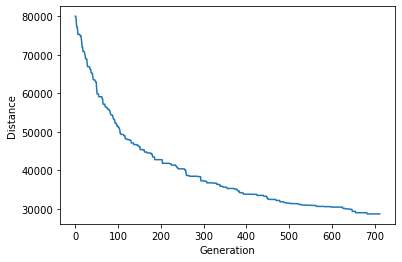

In [23]:
finalDistance = geneticAlgorithm(population=cities, popSize=1000, eliteSize=200, mutationRate=0.001, N=30)

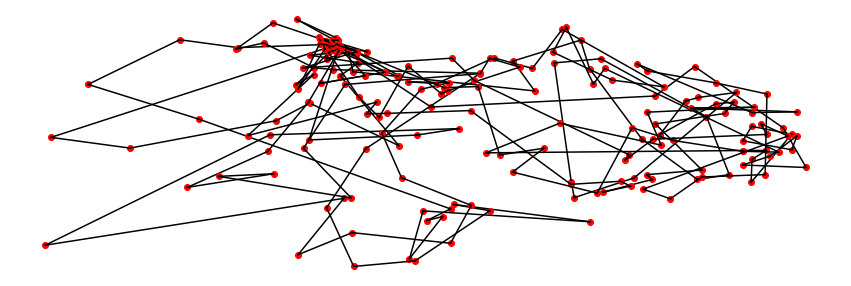

Final fitness: 28690.601584129767
Number of function evaluations: 1428000
Computational time : 2401.4740850925446
Number of generations : 713


In [24]:
showMap(finalDistance[2])
print ("Final fitness: " + str(finalDistance[0]))
print ("Number of function evaluations: " + str(finalDistance[1]))
print ("Computational time : " + str(finalDistance[3]))
print ("Number of generations : " + str(finalDistance[4]))